# Moindres carrés linéaires

## Modélisation
On observe un système $\mathcal S$ qui produit, pour une sollicitation en entrée $t$ donnée, une sortie $Y$ (par exemple la vitesse d'un coureur en fonction du temps, la température d'une pièce mesurée chaque seconde,...). L'objectif est de construire un modèle théorique de $\mathcal S$, qui reproduise aussi fidèlement que possible le comportement du système.

On se donne donc un modèle (une fonction) $f_{\bf x}$, paramétrée par $n$ paramètres ${\bf x}=\left (x_1\cdots x_n\right )^\top\in\mathbb R^n$, qui calcule pour chaque entrée $t$ la valeur $f_{\bf x}(t) = y$. 

Pour $m$ entrées $t_i, 1\leq i\leq m$, on souhaite donc que les valeurs $y_i=f_{\bf x}(t_i)$ calculées par le modèle soient les plus proches possibles des valeurs théoriques $Y_i$ mesurées sur $\mathcal S$. L'ajustement du modèle se fait à l'aide du vecteur de paramètres ${\bf x}$.

L'erreur entre le modèle théorique et la sortie mesurée pour l'entrée $t_i$ est $e_i=y_i-Y_i$ et la solution aux moindres carrés 
consiste à choisir  ${\bf x}$ qui minimise la somme des carrés des erreurs. On pose donc le problème :


Trouver ${\bf x}\in \mathbb R^n$ tel que $\displaystyle\sum_{i=1}^me_i^2$ soit minimale.


Si la fonction $f_{\bf x}$ est  linéaire par rapport aux paramètres ${\bf x}$, alors le modèle s'écrit 
$f_{\bf x}(t_i) = {\bf a_i}^\top{\bf x}$ et on parle de problème au moindres carrés linéaires.

Soient ${\bf Y}\in \mathbb R^m$ le vecteur des valeurs $Y_i$ mesurées sur $\mathcal{S}$, ${\bf e}\in \mathbb R^m$ le vecteur dont les composantes sont les erreurs $e_i$ et  ${\bf A}\in\mathcal{M}_{mn}(\mathbb R)$ la matrice dont les lignes sont les ${\bf a_i^\top} $. Le problème consiste alors à :


Trouver ${\bf x}\in \mathbb R^n$ qui  minimise $\|{\bf Ax}-{\bf Y}\|^2$.


Dans $\mathbb R^m$, il s'agit donc de trouver le point de l'image de ${\bf A}$ le plus proche au sens de la norme euclidienne du vecteur ${\bf Y}$ (qui a peu de chances d'appartenir à $Im({\bf A})$, car $m>>n$). L'unique solution  est  la  projection orthogonale du vecteur ${\bf Y}$ sur le sous-espace $Im({\bf A})$. La solution a déjà été calculée, c'est la solution du système linéaire suivant, dit système aux équations normales : ${\bf A^\top Ax}={\bf A^\top Y}$

Si $rang({\bf A})=n$ (hypothèse raisonnable car $m>>n$ et les ${\bf a_i}$ dépendent des entrées $t_i$), ce système a une solution unique 

${\bf x}={\bf (A^\top A)^{-1}A^\top Y}$

dite solution aux moindres carrés. La matrice ${\bf A^+}={\bf (A^\top A)^{-1}A^\top}$ (Attention !! ce n'est pas la matrice de projection) est la pseudo inverse de la matrice rectangulaire ${\bf A}$. Elle satisfait ${\bf A^+A}=\mathbb I$ et ${\bf AA^+}={\bf P}$.

```{margin} 
![](./images/mcl1.png)
```
````{prf:example} 
Le système $\mathcal{S}$ produit pour les entrées $t_i =\{-1,0,1\}$ les sorties $Y_i=\{4,5,9\}$

On modélise $\mathcal{S}$ à l'aide d'un modèle affine $y=\alpha+\beta t$, où $\alpha$ et $\beta$ sont deux paramètres à déterminer pour minimiser au sens des moindres carrés l'erreur des trois mesures.

| Point | $t_i$ | $Y_i$ | $y_i$          |
|-------|-------|-------|----------------|
| $P_1$ | -1    | 4     | $\alpha-\beta$ |
| $P_2$ | 0     | 5     | $\alpha$       |
| $P_3$ | 1     | 9     | $\alpha+\beta$  |


Le système 
${\bf Ax} = {\bf Y} :
\left \{
\begin{array}{ccccc}
\alpha & - & \beta& = & 4 \\
\alpha &  & & = & 5 \\
\alpha & + & \beta& = & 9 \\
\end{array}
\right.
$

n'a bien sûr pas de solution. On construit les équations normales en multipliant 
le système par 
${\bf A^\top} =\left [\begin{array}{ccc}1 & 1 & 1\\-1 & 0 & 1\\\end{array}\right]$.

Comme
$
{\bf A^\top A}=\left[\begin{array}{cc}3 & 0\\0 & 2\end{array}\right] 
\textrm{ et }
{\bf (A^\top A)^{-1}}=\left [\begin{array}{cc}1/3 & 0\\0 & 1/2\\\end{array}\right]
$
la solution aux moindres carrés est donc $\alpha=6$ et $\beta=5/2$.
Le vecteur des erreurs ${\bf Y}-{\bf Ax}=(1/2$ $-1$ $1/2)^\top $ est bien orthogonal dans $R^3$ aux colonnes de ${\bf A}$. Chaque erreur peut être également représentée par la distance verticale entre la mesure ${ Y_i}$ et la droite $f(t)=6+\frac{5}{2}t$ pour $t=t_i$ (segments rouges).
````






````{prf:example}
 Le système $\mathcal{S}$ produit pour les entrées $t_i =\{-2,-1,0,1,2\}$ les sorties \\$Y_i=\{3,1,-0.5,1.5,4\}$.

On modélise $\mathcal{S}$ par un polynôme $P(t)=\alpha+\beta t+\gamma t^2 = {\bf a^\top}{\bf x}$, où ${\bf x}=\begin{pmatrix}\alpha\\\beta\\\gamma\end{pmatrix} $et ${\bf a}=\begin{pmatrix}1\\t\\t^2\end{pmatrix}$. On recherche les valeurs de $\alpha,\beta,\gamma$ qui minimisent la somme des carrés des erreurs entre les valeurs théoriques et les valeurs mesurées.

| Point | $t_i$ | $Y_i$ | $y_i$          |
|-------|-------|-------|----------------|
| $P_1$ | -2    | 3     | $\alpha-2\beta+4\gamma$ |
| $P_2$ | 1     | 1     | $\alpha-\beta+\gamma$      |
| $P_3$ | 0     | -0.5     | $\alpha$  |
| $P_4$ | 1     | 1.5     | $\alpha+\beta+\gamma$ |
| $P_5$ | 2     | 4     | $\alpha+2\beta+4\gamma$ |


En posant ${\bf A}=\begin{pmatrix}
1&-2&4\\1&-1&1\\1&0&0\\1&1&1\\1&2&4
\end{pmatrix}$ et ${\bf Y}\begin{pmatrix}
3\\1\\-0.5\\1.5\\4
\end{pmatrix}
$, on cherche ${\bf x}$ qui minimise $\|{\bf Ax}-{\bf Y}\|^2$, soit encore ${\bf x}$ solution du système aux équations normales ${\bf A^\top Ax}={\bf A^\top Y}$\\
On a alors 

${\bf A^\top A}=\begin{pmatrix}5&0&10\\0&10&0\\10&0&34\end{pmatrix}\quad{\bf A^\top Y}=\begin{pmatrix}9\\2.5\\30.5\end{pmatrix}\textrm{ d'où } P(t)=\frac{1}{70}+\frac{1}{4}t+\frac{25}{28}t^2$
````

## Systèmes incompatibles
```{index} Système ; incompatible
```
Soit un système linéaire incompatible ${\bf Ax}={\bf b}$, où ${\bf A}\in\mathcal{M}_{mn}(\mathbb R)$ est telle que $rang({\bf A})<m$ et ${\bf b}\notin Im({\bf A})$. On supposera par exemple (comme dans le cas des moindres carrés) que $m>n$ et $rang({\bf A})=n$. Le système n'a donc pas de solution, et on le remplace par le système aux équations normales obtenu en le multipliant par ${\bf A^\top} $ : 

${\bf A^\top Ax}={\bf A^\top b}$

Ce système est en général mal conditionné car $\sigma({\bf A^\top A}) = \sigma^2({\bf A})$ dans le cas d'une matrice carrée ${\bf A}$. La méthode de Gauss risque d'être inefficace et on lui préférera des méthodes basées sur des transformations orthogonales qui ont l'avantage d'être numériquement stables.

Finalement, si les colonnes de ${\bf A}$ sont orthonormées i.e. orthogonales deux à deux et de norme 1) ${\bf A^\top A}=\mathbb I$ (l'identité dans la "petite" dimension $n$) et la solution des équations normales est simplement ${\bf x^*}={\bf A^\top b}$. La  "bonne" stratégie pour résoudre le problème des moindres carrés est donc de construire une base orthonormée de $Im({\bf A})$ pour calculer explicitement la projection. On verra que cette construction revient à triangulariser la matrice par des transformations orthogonales.


## Un exemple de régression polynomiale par moindres carrés

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import inv
from numpy import dot,power

%matplotlib inline

Text(0, 0.5, 'y')

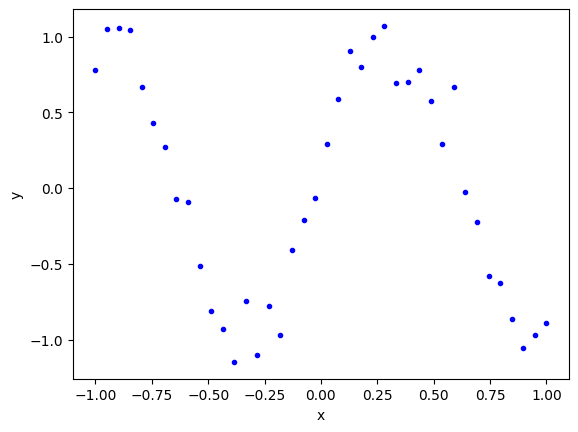

In [2]:
dim_i = 1 
dim_o = 1 
nb_data = 40  

def f(x):
    return np.sin(5*x)[:,None]


x = np.linspace(-1,1,nb_data)
Y = f(x) + np.random.normal(size=(nb_data, dim_o))*2e-1 

plt.plot(x,Y, '.b')
plt.xlabel('x')
plt.ylabel('y')

On fait passer un polynome de degré $d$ par moindres carrés.

In [3]:
d = 5
A = power(x,0)
for i in range(1,d+1):
    A = np.vstack([A, power(x,i)])
A = A.T

X = dot(inv(dot(A.T,A)),dot(A.T, Y)) 
e = np.linalg.norm(dot(A,X)-Y)


On calcule le modèle et les erreurs

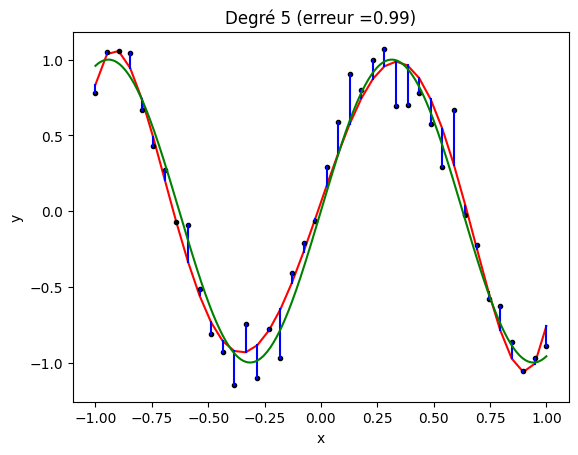

In [4]:
Y_pred = np.dot(A,X)

def plot_data_2D(x, y_true, y_pred, title):
    colors = ['r', 'k', 'b']
    alphas = np.ones(len(x))
 
    plt.plot(x,y_pred, '-' + colors[0])
    
    for i in range(len(x)):
        plt.plot(x[i],y_true[i], '.' + colors[1])
        plt.plot([x[i],x[i]], [y_true[i], y_pred[i]], '-'+colors[2], alpha = alphas[i])
    plt.xlabel('x')
    plt.ylabel('y')
    
    xp = np.linspace(-1,1,300)
    plt.plot(xp,f(xp),'g')
    plt.title(title)
    
    return

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot_title = 'Degré ' + str(d) + ' (erreur ={0:0.2f})'.format(e)
plot_data_2D(x,Y,Y_pred, title=plot_title)

et on teste la précision du modèle en fonction du degré du polynôme

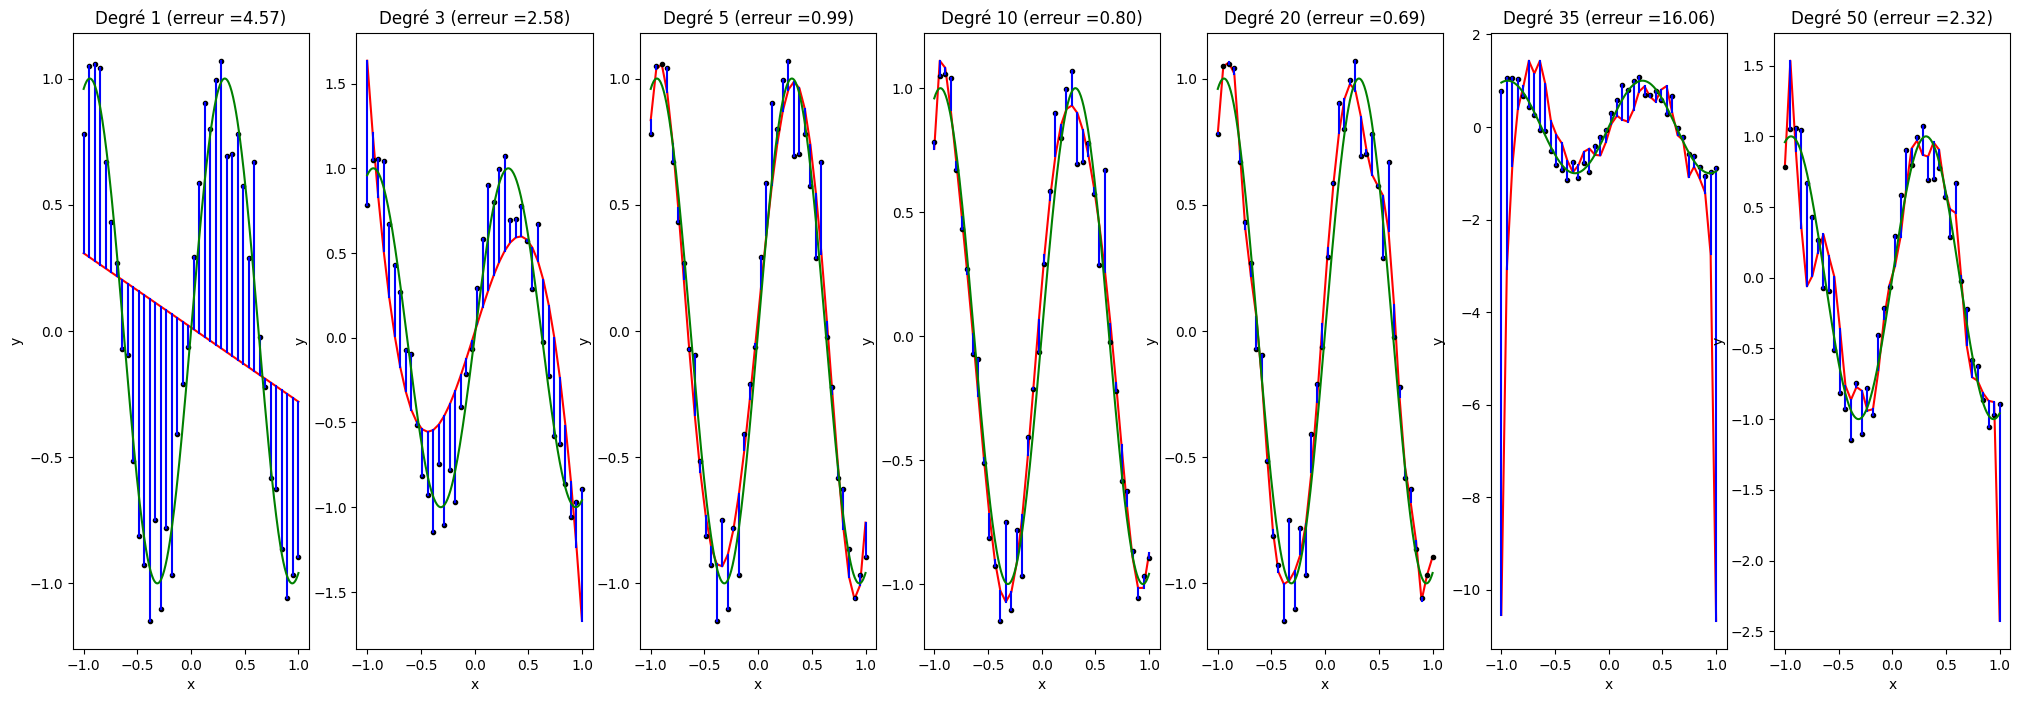

In [5]:
fig = plt.figure(figsize=(25,8))

degre = [1,3,5,10,20,35,50]
for ind,d in enumerate(degre):
    A = power(x,0)
    for i in range(1,d+1):
        A = np.vstack([A, power(x,i)])
    A = A.T 
    X = dot(inv(dot(A.T,A)),dot(A.T, Y)) 
    e = np.linalg.norm(dot(A,X)-Y)
    Y_pred = np.dot(A,X)

    plot_title = 'Degré ' + str(d) + ' (erreur ={0:0.2f})'.format(e)
    plt.subplot(1, len(degre), ind+1)
    plot_data_2D(x,Y,Y_pred,title=plot_title)

## Un exemple de régression linéaire

On construit un nuage de points dans $\mathbb R^3$, initialement sur un plan, et bruité par un bruit suivant une loi centré d'écart-type $\sigma$.

In [6]:
dim_i = 2 
dim_o = 1 
nb_data = 50  

# Construction d'un modèle linéaire bruité
A0 = np.array([[3], [1]])
A = np.random.rand(nb_data, dim_i)
Y = np.dot(A,A0) + np.random.normal(scale = 7e-1, size=(nb_data, dim_o))

On résout le systèmes aux équations normales et on regarde l'erreur  du modèle en fonction du bruit

Erreur :  4.159034390849485


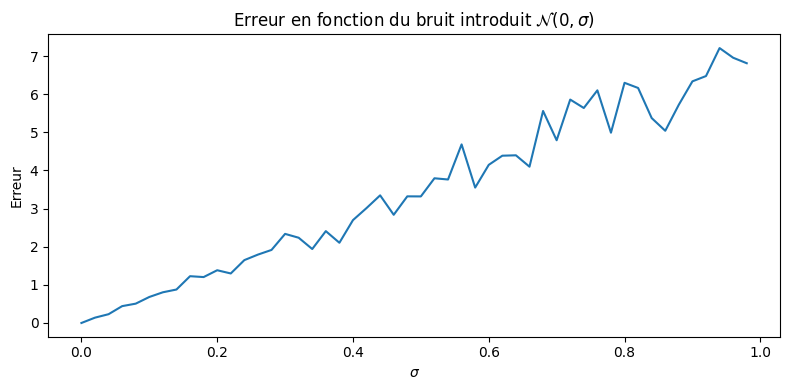

In [7]:
X = dot(inv(dot(A.T,A)),dot(A.T, Y)) 

# Erreur 
print("Erreur : ",np.linalg.norm(np.dot(A,X)-Y,2))
err = []
sigma = [i/50 for i in range(0,50)]
for s in sigma:
    Y = np.dot(A,A0) + np.random.normal(scale = s, size=(nb_data, dim_o))
    X = dot(inv(dot(A.T,A)),dot(A.T, Y)) 
    err.append(np.linalg.norm(np.dot(A,X)-Y,2))

plt.figure(figsize=(8,4))
plt.plot(sigma,err)
plt.title("Erreur en fonction du bruit introduit $\mathcal{N}(0,\sigma)$")
plt.xlabel("$\sigma$")
plt.ylabel("Erreur")
plt.tight_layout()

On affiche le modèle pour un niveau de bruit $s\sigma$=0.7

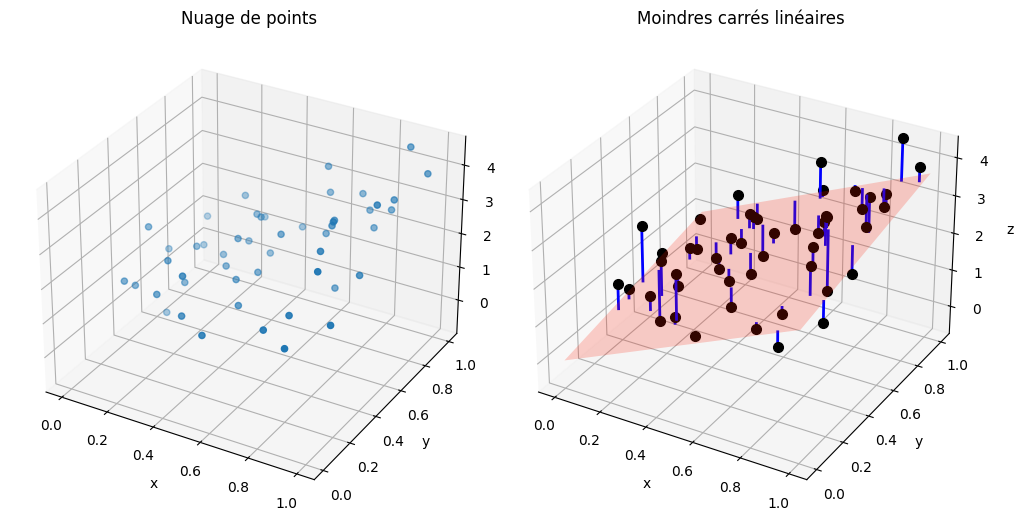

In [8]:
Y = np.dot(A,A0) + np.random.normal(scale = 0.7, size=(nb_data, dim_o))
X = dot(inv(dot(A.T,A)),dot(A.T, Y)) 
err.append(np.linalg.norm(np.dot(A,X)-Y,2))
fig = plt.figure(figsize=(10,20))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(A[:,0],A[:,1],Y.flatten())
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title("Nuage de points")

ax2 = fig.add_subplot(1, 2, 2, projection='3d')

x = [0,1,1,0]
y = [0,0,1,1]
z = [0,dot(np.array([1,0]),X),dot(np.array([1,1]),X),dot(np.array([0,1]),X)]
verts = [list(zip(x,y,z))]
predicted_plane = Poly3DCollection(verts,alpha=0.2)
predicted_plane.set_facecolor([1.,0.1,0.])
ax2.add_collection3d(predicted_plane)

for t in range(nb_data):
    ax2.plot3D([A[t,0], A[t,0]], [A[t,1], A[t,1]], [Y[t,0], dot(A[t,:],X)], '-b', linewidth=2)
    ax2.plot3D(A[t,0:1], A[t,1:2], Y[t,0:1], '.k', markersize=14)
    
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title("Moindres carrés linéaires")

plt.tight_layout()